In [3]:
%%bash
cd /home/rodrigo/repos/abalone-BoAI
pip install -e .

Obtaining file:///home/rodrigo/repos/abalone-BoAI
  Found existing installation: abalone 1.0.0
    Uninstalling abalone-1.0.0:
      Successfully uninstalled abalone-1.0.0
  Running setup.py develop for abalone


# Abalone

In [173]:
from abalone.game import Game
from abalone.run_game import run_game

%load_ext autoreload
%autoreload 2

In [280]:
game = Game()
moves_history = []

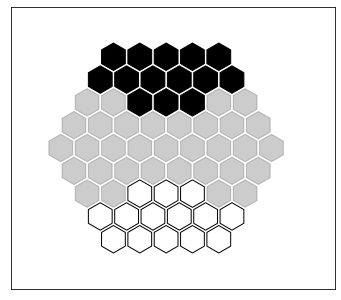

In [283]:
game.get_plot()

In [13]:
from abalone.human_player import HumanPlayer 
from abalone.random_player import RandomPlayer

In [14]:

list(run_game(HumanPlayer(), RandomPlayer()))

BLACK 14 - WHITE 14
    I ● ● ● ● ●
   H ● ● ● ● ● ●
  G · · ● ● ● · ·
 F · · · · · · · ·
E · · · · · · · · ·
 D · · · · · · · · 9
  C · · ● ● ● · · 8
   B ● ● ● ● ● ● 7
    A ● ● ● ● ● 6
       1 2 3 4 5


[?] What type of move do you want to perform?: In-line
 > In-line
   Broadside

BLACK's move caused an exception

Traceback (most recent call last):
  File "/home/rodrigo/repos/abalone-BoAI/abalone/run_game.py", line 86, in run_game
    move = black.turn(game, moves_history) if game.turn is Player.BLACK else white.turn(game, moves_history)
  File "/home/rodrigo/repos/abalone-BoAI/abalone/human_player.py", line 107, in turn
    move_type = _prompt_move_type()
  File "/home/rodrigo/repos/abalone-BoAI/abalone/human_player.py", line 34, in _prompt_move_type
    choices=['In-line', 'Broadside']
  File "/home/rodrigo/anaconda3/envs/py37/lib/python3.7/site-packages/inquirer/prompt.py", line 14, in prompt
    answers[question.name] = render.render(question, answers)
  File "/home/rodrigo/an

[(<abalone.game.Game at 0x7f1d88256650>, [])]

In [26]:
for i in game.generate_legal_moves():
    print(i)

(<Space.A1: ('A', '1')>, <Direction.NORTH_EAST: 'north-east'>)
(<Space.A1: ('A', '1')>, <Direction.NORTH_WEST: 'north-west'>)
(<Space.A2: ('A', '2')>, <Direction.NORTH_EAST: 'north-east'>)
(<Space.A2: ('A', '2')>, <Direction.NORTH_WEST: 'north-west'>)
(<Space.A3: ('A', '3')>, <Direction.NORTH_EAST: 'north-east'>)
(<Space.A3: ('A', '3')>, <Direction.NORTH_WEST: 'north-west'>)
(<Space.A4: ('A', '4')>, <Direction.NORTH_EAST: 'north-east'>)
(<Space.A4: ('A', '4')>, <Direction.NORTH_WEST: 'north-west'>)
(<Space.A5: ('A', '5')>, <Direction.NORTH_EAST: 'north-east'>)
(<Space.A5: ('A', '5')>, <Direction.NORTH_WEST: 'north-west'>)
(<Space.B1: ('B', '1')>, <Direction.NORTH_EAST: 'north-east'>)
(<Space.B1: ('B', '1')>, <Direction.NORTH_WEST: 'north-west'>)
((<Space.B1: ('B', '1')>, <Space.B2: ('B', '2')>), <Direction.NORTH_WEST: 'north-west'>)
(<Space.B2: ('B', '2')>, <Direction.NORTH_EAST: 'north-east'>)
(<Space.B2: ('B', '2')>, <Direction.NORTH_WEST: 'north-west'>)
((<Space.B2: ('B', '2')>, <Sp

In [27]:
len(game.generate_legal_moves())

TypeError: object of type 'generator' has no len()

# Hex

In [25]:
%%bash
cd /home/rodrigo/repos/hexalattice/
pip install -e .
pip install colormap

Obtaining file:///home/rodrigo/repos/hexalattice
  Found existing installation: hexalattice-alexkaz 1.0.0
    Uninstalling hexalattice-alexkaz-1.0.0:
      Successfully uninstalled hexalattice-alexkaz-1.0.0
  Running setup.py develop for hexalattice-alexkaz
  Created wheel for colormap: filename=colormap-1.0.3-cp37-none-any.whl size=15561 sha256=895e3225b5cc26e257f999122dc13bbe0c254c807c4caa3ae9a0e58c1d9eda88
  Stored in directory: /home/rodrigo/.cache/pip/wheels/b5/c4/23/5f5d3e77fb0d00f44ee147a9cbb3acb641b9ebe2f3d5406c66
Successfully built colormap


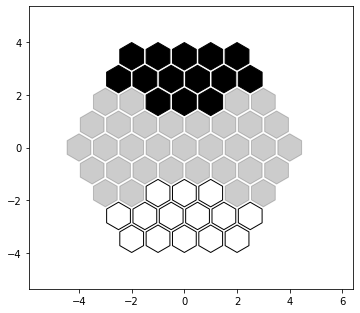

In [279]:
from hexalattice import hexalattice as hexa
from matplotlib import pyplot as plt
import numpy as np

hex_centers, h_ax = hexa.create_hex_grid(nx=9, ny=9, min_diam=1, do_plot=False)
tile_centers_x = hex_centers[:, 0]
tile_centers_y = hex_centers[:, 1]

indexes = [
    list(range(2,7)),
    list(range(10,16)),
    list(range(19,26)),
    list(range(27,35)),
    list(range(36,45)),
    list(range(45,53)),
    list(range(55,62)),
    list(range(64,70)),
    list(range(74,79)),
]
np.hstack(indexes)

edge_in_board = np.hstack(np.array([0,0,0,0.2]))
edge_out_board = np.hstack(np.array([1,1,1,0]))
edge_in_board_occupuied =np.hstack(np.array([0,0,0,1]))


black_piece = np.hstack(np.array([0,0,0,1]))
white_piece = np.hstack(np.array([1,1,1,1]))
blank_piece = np.hstack(np.array([0,0,0,0.2]))

new_edge_colors = np.zeros(colors.shape)
new_edge_colors[:,:] = edge_out_board
new_edge_colors[np.hstack(indexes)] = edge_in_board

new_face_colors = np.zeros(colors.shape)

for game_piece, index in zip(np.hstack(game.board), np.hstack(indexes)):
    if game_piece.value == 1:
        new_face_colors[index] = black_piece
        new_edge_colors[index] = edge_in_board_occupuied
    elif game_piece.value == 0:
        new_face_colors[index] = blank_piece
    elif game_piece.value == -1:
        new_face_colors[index] = white_piece
        new_edge_colors[index] = edge_in_board_occupuied
    else:
        raise ValueError(f'Unknown game piece value:{game_piece.value}')

hexa.plot_single_lattice_custom_colors(hex_centers[:, 0], hex_centers[:, 1],
                              face_color=new_face_colors,
                              edge_color=new_edge_colors,
                              min_diam=0.95,
                              plotting_gap=0.05,
                              rotate_deg=0,
                             )

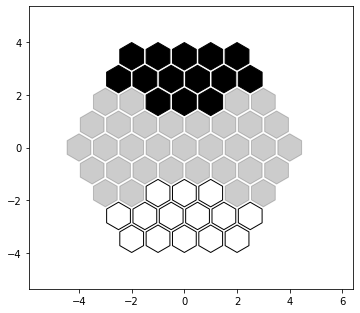

In [252]:
colors.shape

(81, 4)

In [22]:
tile_centers_x

array([-5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,
       -5. , -4. , -3. , -2. , -1. ,  0. ,  1. ,  2. ,  3. ,  4. ,  5. ,
       -5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,
       -5. , -4. , -3. , -2. , -1. ,  0. ,  1. ,  2. ,  3. ,  4. ,  5. ,
       -5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,
       -5. , -4. , -3. , -2. , -1. ,  0. ,  1. ,  2. ,  3. ,  4. ,  5. ,
       -5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,
       -5. , -4. , -3. , -2. , -1. ,  0. ,  1. ,  2. ,  3. ,  4. ,  5. ,
       -5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,
       -5. , -4. , -3. , -2. , -1. ,  0. ,  1. ,  2. ,  3. ,  4. ,  5. ,
       -5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5])